In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt("data/events_smear.txt")

# Delete Energy (E) entries
# data = np.delete(data, [0, 4], axis=1)

# Delete theta and phi
# data = np.delete(data, [8, 9], axis=1)
input_dimension = data.shape[1]

In [3]:
seed = 1337

In [4]:
import random
random.seed(seed)
np.random.seed(seed)

In [5]:
data.shape

(100000, 10)

In [6]:
# thetas = data[:, 8]
# phis = data[:, 9]

In [7]:
# data = np.delete(data, [8, 9], axis=1)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
_, X_test = train_test_split(data, test_size=0.15, random_state=seed)

In [9]:
thetas = X_test[:, 8]
phis = X_test[:, 9]
X_test = np.delete(X_test, [8, 9], axis=1)

In [10]:
min(thetas), max(thetas), min(phis), max(phis)

(0.008429667755828287,
 3.141013779750863,
 0.0003377678823901755,
 3.1415910690840825)

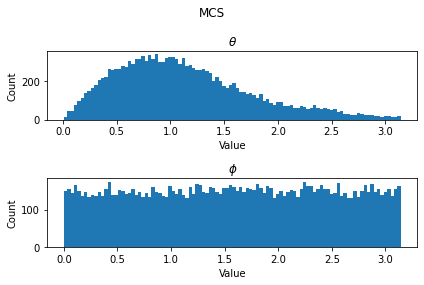

In [11]:
def angle_plot(thetas, phis, title="MCS"):
    fig, ax = plt.subplots(2,1)
    ax[0].hist((thetas), bins=100)
    ax[0].set_title(r"$\theta$")
    ax[0].set_xlabel("Value")
    ax[0].set_ylabel("Count")
    ax[1].hist((phis), bins=100)
    ax[1].set_title(r"$\phi$")
    ax[1].set_xlabel("Value")
    ax[1].set_ylabel("Count")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

angle_plot(thetas, phis)

In [12]:
def momentum_particle_sums(data):
    p_x_sum = data[:, 1] + data[:, 5]
    p_y_sum = data[:, 2] + data[:, 6]
    p_z_sum = data[:, 3] + data[:, 7]
    return p_x_sum, p_y_sum, p_z_sum

In [13]:
run_name = f"-smeared-final-{seed}"

In [14]:
NF_generated  = np.loadtxt(f"./generated/NF{run_name}.txt",)
vae_generated = np.loadtxt(f"./generated/VAE{run_name}.txt",)
gan_generated = np.loadtxt(f"./generated/GAN{run_name}.txt",)

In [15]:
def plot_momenta(data, axs, name):
    p_x_sum, p_y_sum, p_z_sum = momentum_particle_sums(data)
    axs[0].set_title(f"{name}, $p_x$")
    axs[0].hist(p_x_sum, bins=100)
    axs[1].set_title(f"{name}, $p_y$")
    axs[1].hist(p_y_sum, bins=100)
    axs[2].set_title(f"{name}, $p_z$")
    axs[2].hist(p_z_sum, bins=100)

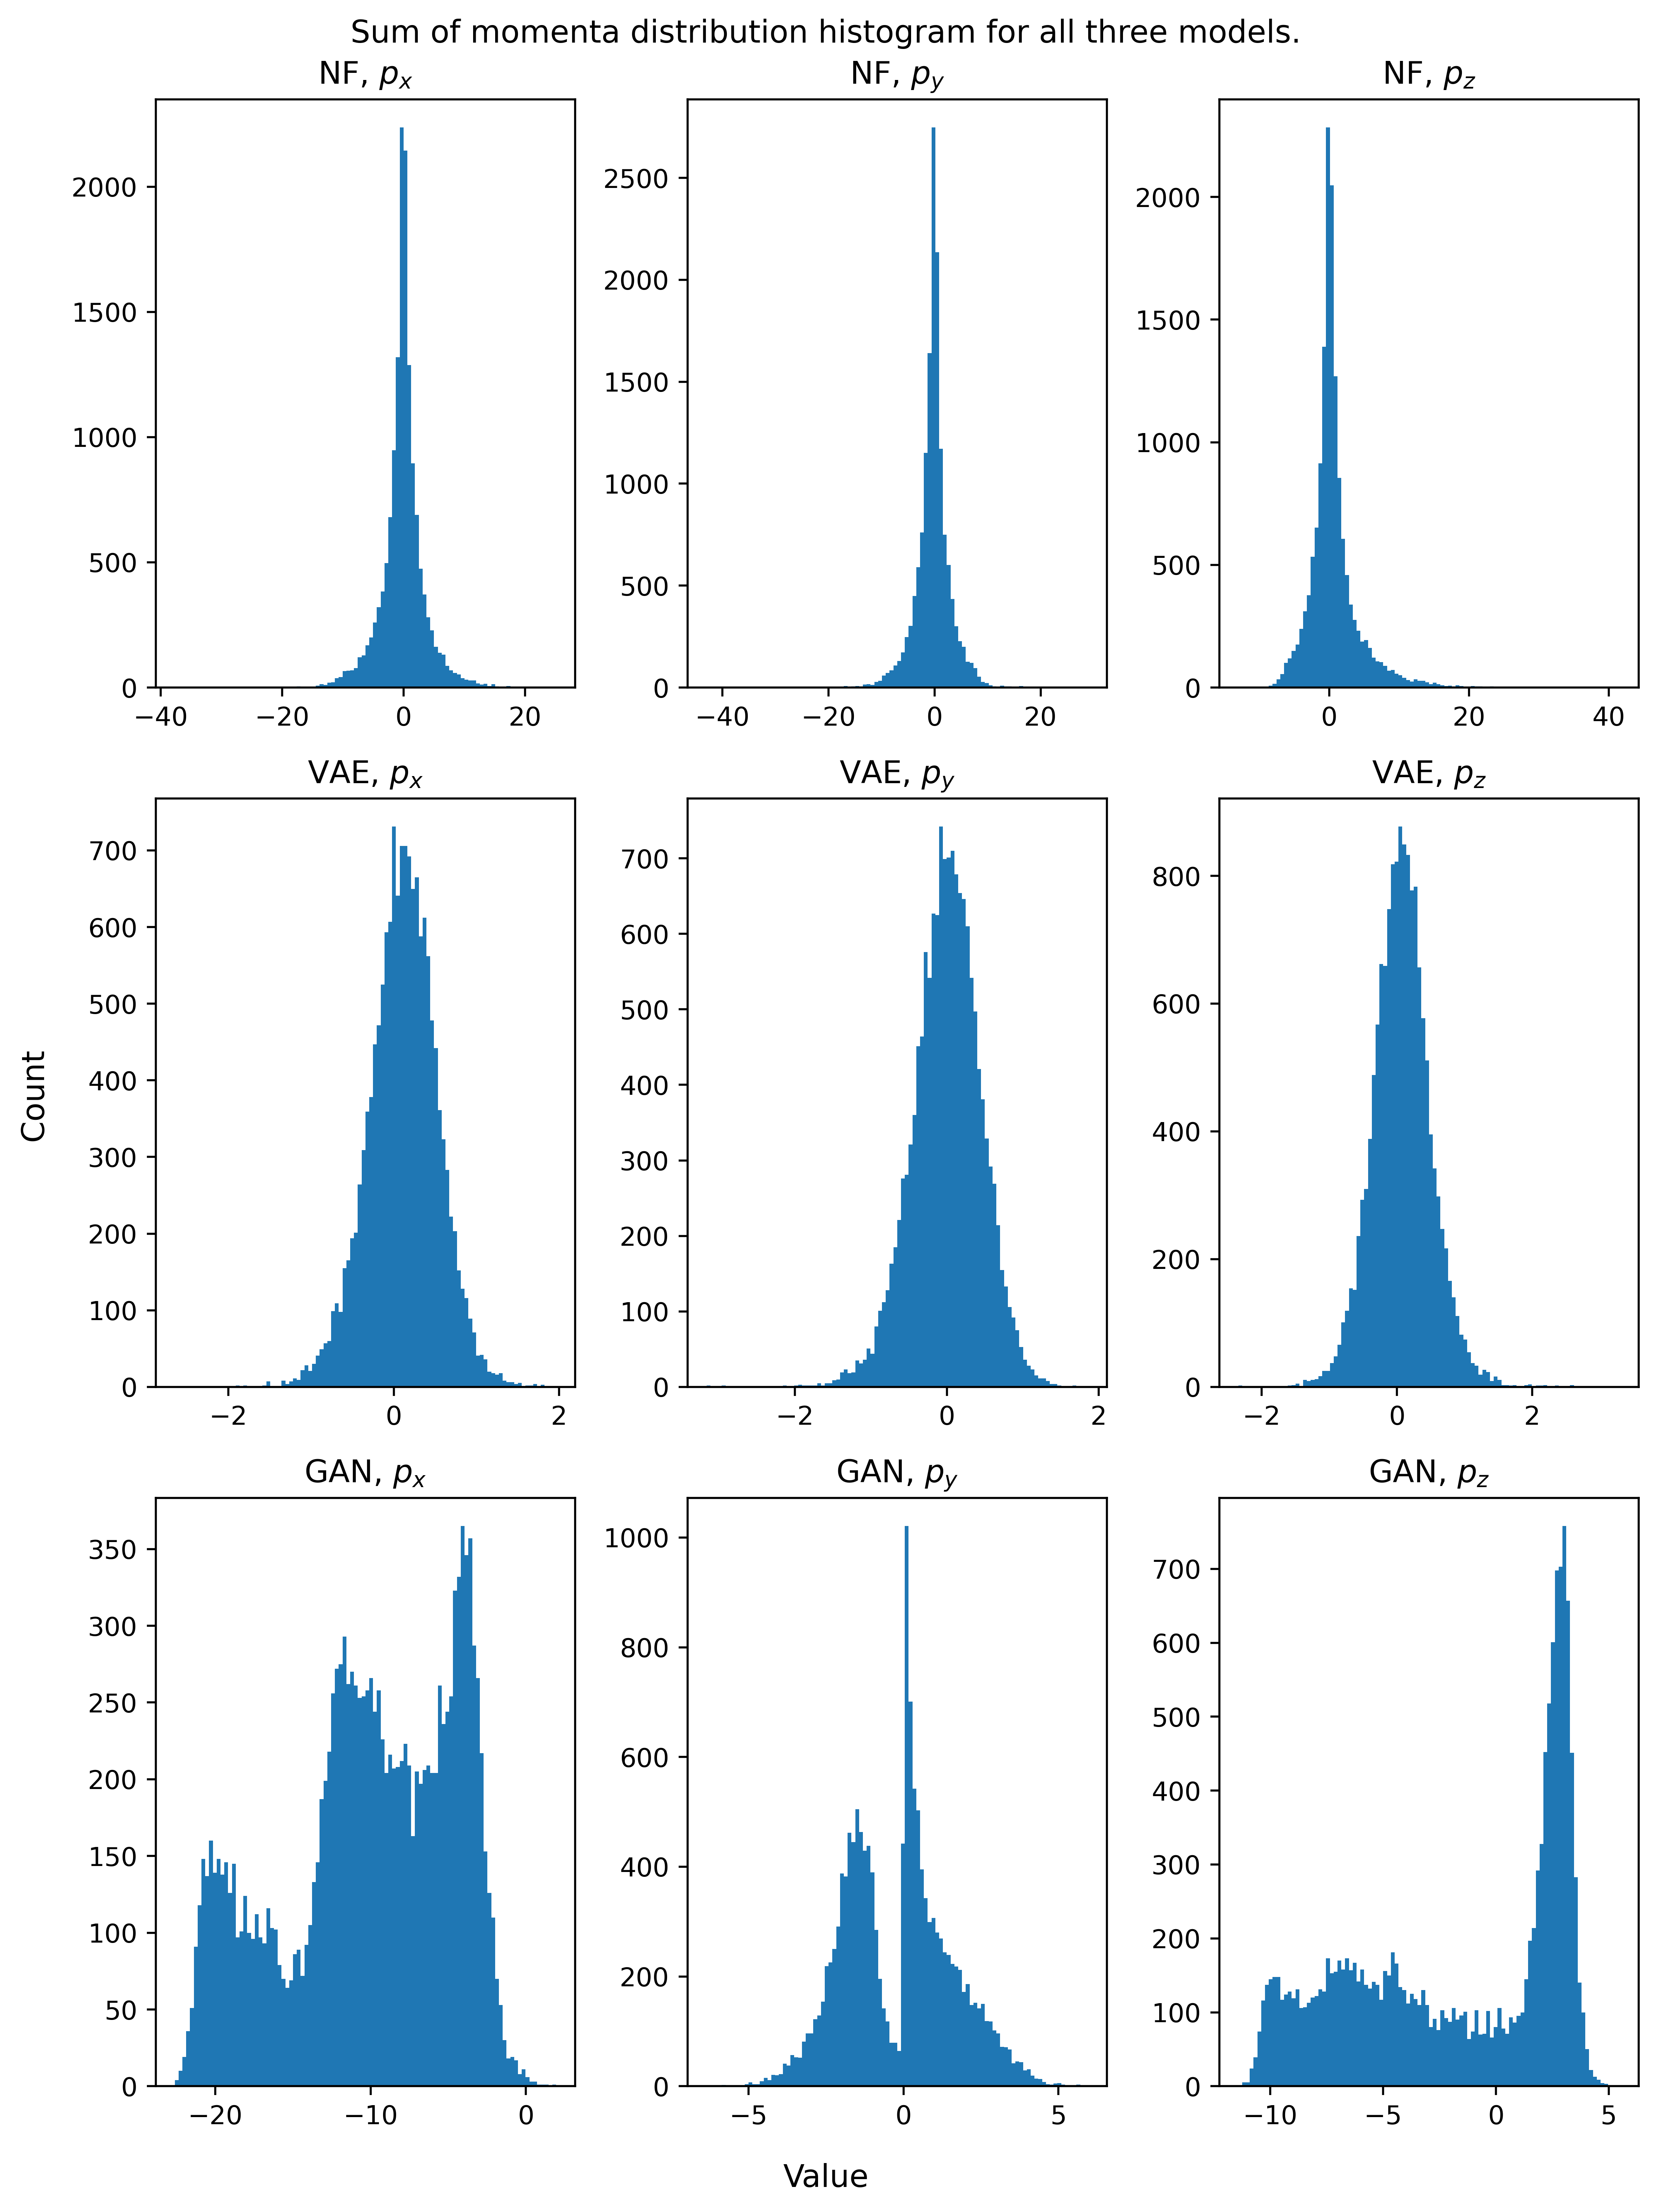

In [16]:
fig, axs3d = plt.subplots(3,3, figsize=(9, 12), dpi=500)
plot_momenta(NF_generated, axs3d[0], "NF")
plot_momenta(vae_generated, axs3d[1], "VAE")
plot_momenta(gan_generated, axs3d[2], "GAN")
plt.suptitle("Sum of momenta distribution histogram for all three models.")
fig.supxlabel("Value")
fig.supylabel("Count")
plt.tight_layout()
plt.show()

In [17]:
data[0]

array([ 96.48655333,  27.87917929, -60.91837551,  69.43599831,
        96.48655333, -27.87917929,  60.91837551, -69.43599831,
         0.76750642,   1.14160046])

In [18]:
p1 = data[0, 0:4]
p2 = data[0, 4:8]

In [19]:
(p1[0])**2 - p1[1]**2 - p1[2]**2 - p1[3]**2

3.637978807091713e-12

In [20]:
2*p2[0]**2, 2*p2[1]**2, 2*p2[2]**2, 2*p2[3]**2

(18619.309948710878, 1554.4972759319442, 7422.0969506951915, 9642.715722083736)

In [21]:
(1110**2) - ((-60)**2) - (55**2) - ((-33)**2)

1224386

In [22]:
def dispersion(p):
    E, px, py, pz = p
    return E**2 - px**2 - py**2 - pz**2

In [23]:
dispersion(p1)

3.637978807091713e-12

In [24]:
np.sqrt(dispersion(p2))

1.9073486328125e-06

In [25]:
np.sqrt(dispersion(p1))

1.9073486328125e-06

In [26]:
np.sqrt(dispersion(p1 + p2))

192.97310666883547

In [27]:
p1

array([ 96.48655333,  27.87917929, -60.91837551,  69.43599831])

In [28]:
p2

array([ 96.48655333, -27.87917929,  60.91837551, -69.43599831])

In [29]:
p1_test = np.array([100.0, 20.5345918781858, -73.4126607205175, 64.72180299041842])
p2_test = np.array([100.0, -20.5345918781858, 73.4126607205175, -64.72180299041842])

In [30]:
p1_test = np.array([100.   ,       -0.66211334 ,-26.71187189 ,-96.36408826])
p2_test = np.array( [100. ,          0.66211334,  26.71187189 , 96.36408826])

print(dispersion(p1_test))
print(dispersion(p2_test))

-1.2384953151922673e-07
-1.2384953151922673e-07


In [31]:
p1_test + p2_test

array([200.,   0.,   0.,   0.])

In [32]:
p1 + p2

array([192.97310667,   0.        ,   0.        ,   0.        ])

In [33]:
np.sqrt(dispersion(p1))

1.9073486328125e-06

In [34]:
def get_phi(p):
    E, px, py, pz = p
    return np.arctan(py / px)

def get_theta(p):
    E, px, py, pz = p
    return (np.arccos(pz / np.sqrt(px**2 + py**2 + pz**2)))

In [35]:
print(get_theta(p1), get_phi(p1))

0.7675064242507839 -1.141600464145766


In [36]:
p1

array([ 96.48655333,  27.87917929, -60.91837551,  69.43599831])

In [37]:
data[0]

array([ 96.48655333,  27.87917929, -60.91837551,  69.43599831,
        96.48655333, -27.87917929,  60.91837551, -69.43599831,
         0.76750642,   1.14160046])

In [38]:
NF_phis  = np.array(list(map(get_phi, NF_generated[:, 0:4])) + list(map(get_phi, NF_generated[:, 4:8])))
VAE_phis = np.array(list(map(get_phi, vae_generated[:, 0:4])) + list(map(get_phi, vae_generated[:, 4:8])))
GAN_phis = np.array(list(map(get_phi, gan_generated[:, 0:4])) + list(map(get_phi, gan_generated[:, 4:8])))
test_phis = np.array(list(map(get_phi, X_test[:, 0:4])) + list(map(get_phi, X_test[:, 4:8])))
NF_thetas  = np.array(list(map(get_theta, NF_generated[:, 0:4])) + list(map(get_theta, NF_generated[:, 4:8])))
VAE_thetas = np.array(list(map(get_theta, vae_generated[:, 0:4])) + list(map(get_theta, vae_generated[:, 4:8])))
GAN_thetas = np.array(list(map(get_theta, gan_generated[:, 0:4])) + list(map(get_theta, gan_generated[:, 4:8])))
test_thetas = np.array(list(map(get_theta, X_test[:, 0:4])) + list(map(get_theta, X_test[:, 4:8])))

In [39]:
NF_disp  = np.array(list(map(dispersion, NF_generated[:, 0:4]))  + list(map(dispersion, NF_generated[:, 4:8])))
VAE_disp = np.array(list(map(dispersion, vae_generated[:, 0:4])) + list(map(dispersion, vae_generated[:, 4:8])))
GAN_disp = np.array(list(map(dispersion, gan_generated[:, 0:4])) + list(map(dispersion, gan_generated[:, 4:8])))
test_disp = np.array(list(map(dispersion, X_test[:, 0:4]))       + list(map(dispersion, X_test[:, 4:8])))

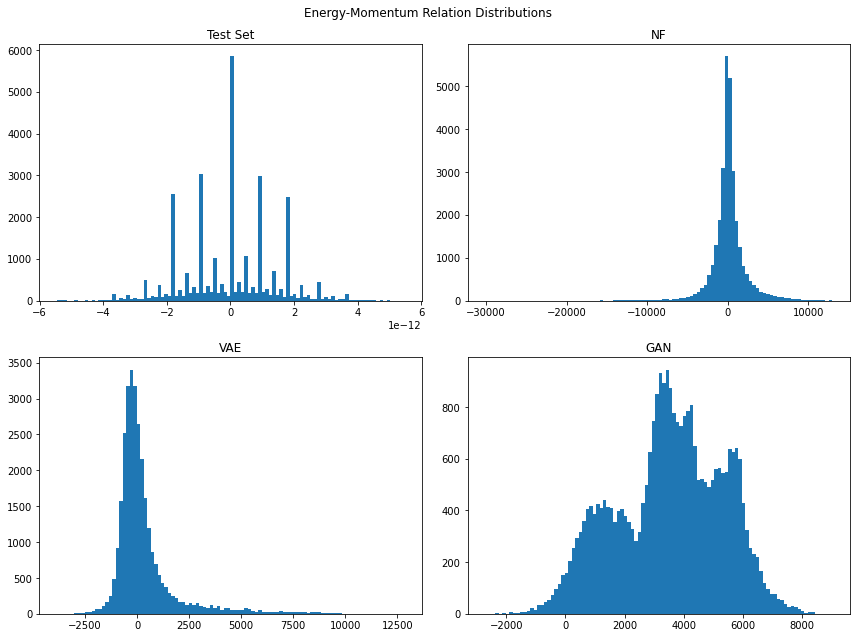

In [40]:
fig, axs = plt.subplots(2, 2, figsize=(12,9))

axs[0][0].hist(test_disp, bins=100)
axs[0][0].set_title("Test Set")
# plt
# plt.show()
axs[0][1].hist(NF_disp, bins=100)
axs[0][1].set_title("NF")
# plt.show()
axs[1][0].hist(VAE_disp, bins=100)
axs[1][0].set_title("VAE")
# plt.show()
axs[1][1].hist(GAN_disp, bins=100)
axs[1][1].set_title("GAN")
plt.suptitle("Energy-Momentum Relation Distributions")
plt.tight_layout()
plt.show()

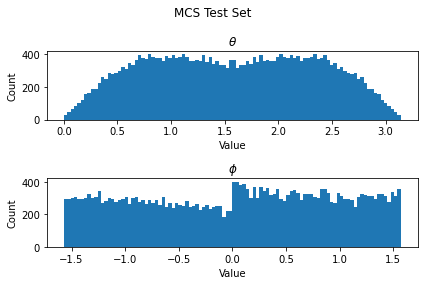

In [41]:
angle_plot(phis=test_phis, thetas=test_thetas, title="MCS Test Set")

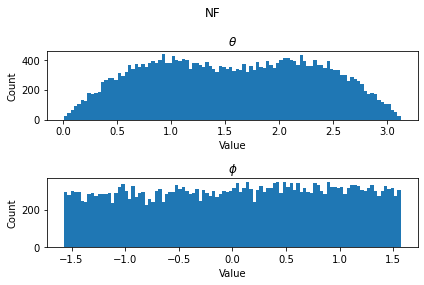

In [42]:
angle_plot(phis=NF_phis, thetas=NF_thetas, title="NF")

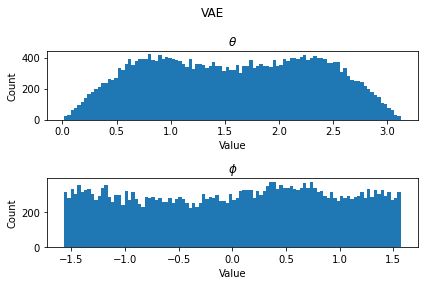

In [43]:
angle_plot(phis=VAE_phis, thetas=VAE_thetas, title="VAE")

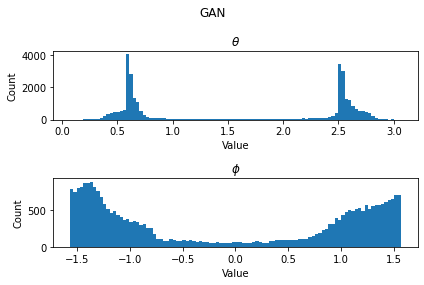

In [44]:
angle_plot(phis=GAN_phis, thetas=GAN_thetas, title="GAN")

In [45]:
def write_generated_to_csv(data, filename):
    df = pd.DataFrame(data, columns=['E1', 'p_x1', 'p_y1', 'p_z1', 'E2', 'p_x1', 'p_y1', 'p_z1'])
    df.to_csv(filename, index_label="ID")

In [46]:
write_generated_to_csv(NF_generated, "./output/test.csv")

In [47]:
import scipy.stats

In [48]:
pdvg, pv = scipy.stats.chisquare(X_test)

In [49]:

a = [scipy.stats.ks_2samp(X_test[i], vae_generated[i]) for i in range(8)]
a = [(x[0], x[1]) for x in a]
a = np.stack(a, axis=1)
print("###")
b = [scipy.stats.ks_2samp(X_test[i], gan_generated[i]) for i in range(8)]
b = [(x[0], x[1]) for x in b]
b = np.stack(b, axis=1)
print("###")
c = [scipy.stats.ks_2samp(X_test[i], NF_generated[i]) for i in range(8)]
c = [(x[0], x[1]) for x in c]
c = np.stack(c, axis=1)

np.vstack((a,b,c)).shape

###
###


(6, 8)

In [50]:
np.savetxt("output/ks_2samp.csv", (np.vstack((a,b,c))), delimiter=' & ', fmt='%2.2e', newline=' \\\\\n')

In [51]:
a = np.stack(scipy.stats.ttest_ind(X_test, vae_generated))
b = np.stack(scipy.stats.ttest_ind(X_test, gan_generated))
c = np.stack(scipy.stats.ttest_ind(X_test, NF_generated))
(np.vstack((a,b,c))).shape

(6, 8)

In [52]:
(np.vstack((a,b,c)))

array([[ 1.37443440e+000, -3.98597879e+000, -3.20794272e+000,
        -1.13267401e+001,  1.65213856e+000,  3.80310051e+000,
         3.21092800e+000,  1.11996167e+001],
       [ 1.69317131e-001,  6.73614507e-005,  1.33828478e-003,
         1.11154414e-029,  9.85167729e-002,  1.43179354e-004,
         1.32446465e-003,  4.67674398e-029],
       [-6.57843081e+001,  2.49735001e+001, -7.59171179e+000,
        -6.44122770e+001, -4.62151631e+001, -3.05987219e+000,
         7.99398302e+000,  6.93295371e+001],
       [ 0.00000000e+000,  2.93350977e-136,  3.24866038e-014,
         0.00000000e+000,  0.00000000e+000,  2.21626883e-003,
         1.35306997e-015,  0.00000000e+000],
       [-3.05914907e+000,  6.83626530e-002,  5.66408613e-001,
         1.19571934e+000, -3.55513595e+000,  9.42160823e-002,
        -1.20912595e-001, -2.30782264e+000],
       [ 2.22162389e-003,  9.45497406e-001,  5.71120278e-001,
         2.31815555e-001,  3.78364621e-004,  9.24938139e-001,
         9.03761076e-001,  2.10

In [53]:
np.savetxt("output/ttest_rel.csv", (np.vstack((a,b,c))), delimiter=' & ', fmt='%2.2e', newline=' \\\\\n')

In [54]:
print(" \\\\\n".join([" & ".join([f"{entry:.2f}" for entry in line]) for line in np.vstack((a,b,c))]))

1.37 & -3.99 & -3.21 & -11.33 & 1.65 & 3.80 & 3.21 & 11.20 \\
0.17 & 0.00 & 0.00 & 0.00 & 0.10 & 0.00 & 0.00 & 0.00 \\
-65.78 & 24.97 & -7.59 & -64.41 & -46.22 & -3.06 & 7.99 & 69.33 \\
0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\
-3.06 & 0.07 & 0.57 & 1.20 & -3.56 & 0.09 & -0.12 & -2.31 \\
0.00 & 0.95 & 0.57 & 0.23 & 0.00 & 0.92 & 0.90 & 0.02


In [57]:
def write_generated_to_csv(data, filename):
    df = pd.DataFrame(data, columns=['E1', 'p_x1', 'p_y1', 'p_z1', 'E2', 'p_x2', 'p_y2', 'p_z2'])
    df.to_csv(filename, index_label="ID")

In [58]:
write_generated_to_csv(vae_generated, "output/vae.csv")
write_generated_to_csv(gan_generated, "output/gan.csv")
write_generated_to_csv(NF_generated, "output/nf.csv")